In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import defaultdict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/survey_results_public.csv')
schema = pd.read_csv('../Data/survey_results_schema.csv')
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(19102, 154)

# Analysis

### Which colummns have missing values?

In [4]:
# columns with null values
null_val_col = [col for col in data.columns if data[col].isnull().any()]
null_val_col

['MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 '

### Which columns don't have missing values?

In [5]:
# columns without null values
cols = data.columns[data.isnull().mean()==0]
cols

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

### Which columns have most missing values, more than 75% ?

In [6]:
most_missing_val_cols = data.columns[data.isnull().mean() > 0.75]
most_missing_val_cols

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp',
       'ExpectedSalary'],
      dtype='object')

### How many professional status values are present in the dataset?

In [7]:
status_values = data['Professional'].value_counts()
status_values

Professional developer                                  13774
Student                                                  2821
Professional non-developer who sometimes writes code     1782
None of these                                             368
Used to be a professional developer                       357
Name: Professional, dtype: int64

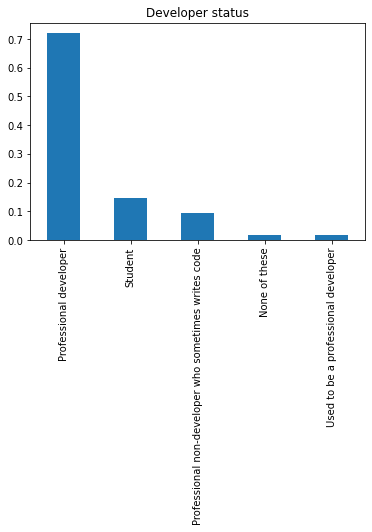

In [8]:
# plot the status values
(status_values/data.shape[0]).plot(kind="bar")
plt.title('Developer status');

Around 70% of the developers in the dataset are Professional Developers

### How many Formal Education status values are present in the dataset?

In [9]:
formal_edu_values = data['FormalEducation'].value_counts()
formal_edu_values

Bachelor's degree                                                    8099
Master's degree                                                      4143
Some college/university study without earning a bachelor's degree    2869
Secondary school                                                     2227
Doctoral degree                                                       551
I prefer not to answer                                                409
Primary/elementary school                                             404
Professional degree                                                   255
I never completed any formal education                                145
Name: FormalEducation, dtype: int64

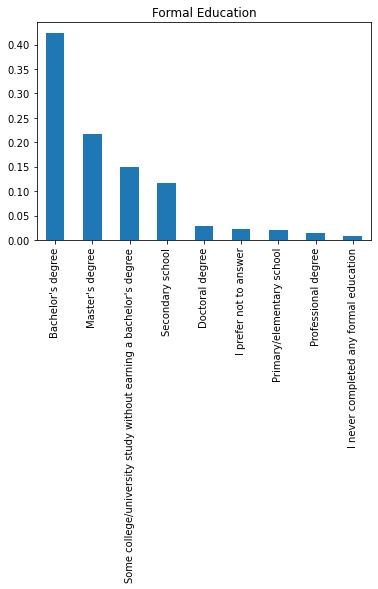

In [10]:
# plot the data  
(formal_edu_values/data.shape[0]).plot(kind='bar')
plt.title('Formal Education');

Around 45% of the developers completed and have Bachelor's degree


### How many countries are present in the data and how many developers are belong to a country?

In [11]:
country_values = data['Country'].value_counts()
country_values

United States               4364
India                       1557
United Kingdom              1424
Germany                     1337
Canada                       874
                            ... 
Angola                         1
Burkina Faso                   1
Lesotho                        1
Virgin Islands (British)       1
Virgin Islands (USA)           1
Name: Country, Length: 165, dtype: int64

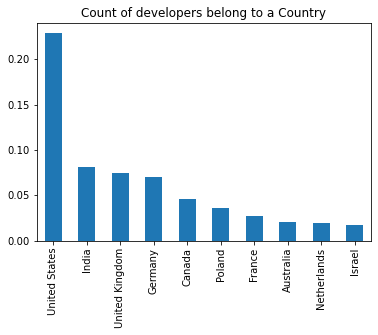

In [12]:
# plot countries 
(country_values[:10]/data.shape[0]).plot(kind='bar')
plt.title('Count of developers belong to a Country');

# Analyzing further for more info

In [13]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Create a function to return description of the column from the schema file

In [14]:
def get_description(column_name):
    """
    INPUT : column_name (name of the column, whose description you want to know)
    OUTPUT : description of the input column name
    """
    return list(schema[schema['Column'] == column_name]['Question'])[0]

let's get the description of the column of interest which is **CousinEducation**

In [15]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

### How many status values for CousinEduaction column we have

In [16]:
ce_values = data['CousinEducation'].value_counts().reset_index()
ce_values

,index,CousinEducation
0,Take online courses; Buy books and work throug...,192
1,None of these,167
2,Take online courses,158
3,Take online courses; Part-time/evening courses...,140
4,Take online courses; Bootcamp; Part-time/eveni...,132
...,...,...
596,Return to college; Bootcamp; Participate in on...,1
597,Return to college; Master's degree; Part-time/...,1
598,Master's degree; Participate in hackathons; Co...,1
599,Get a job as a QA tester; Participate in hacka...,1


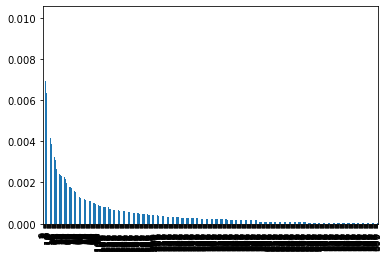

In [17]:
(ce_values['CousinEducation']/data.shape[0]).plot(kind='bar');

let's clean the **CousinEducation** Column

In [18]:
def total_count(data, col1, col2, ed_types):
    new_df = defaultdict(int)
    # loop through list of education types
    for val in ed_types:
        # loop through rows
        for idx in range(data.shape[0]):
            # if the education type is in row add 1
            if val in data[col1][idx]:
                new_df[val] += int(data[col2][idx])
    
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [19]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 'Contribute to open source', "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]


study = data['CousinEducation'].value_counts().reset_index()
study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)

new_df = total_count(study, 'method', 'count', possible_vals)
new_df

,method,count
0,Take online courses,4440
1,Buy books and work through the exercises,3422
5,Contribute to open source,2318
3,Part-time/evening courses,2181
7,Bootcamp,1569
6,Conferences/meet-ups,1538
4,Return to college,1469
8,Get a job as a QA tester,1036
9,Participate in online coding competitions,999
10,Master's degree,772


<AxesSubplot:xlabel='method'>

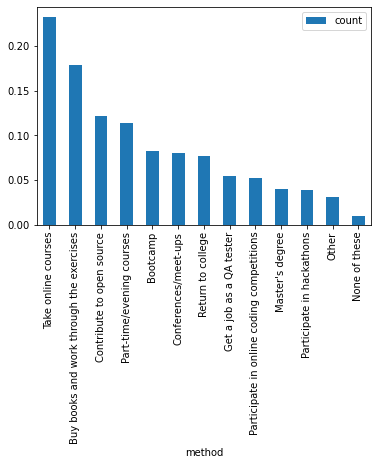

In [20]:
new_df.set_index('method', inplace=True)
(new_df/data.shape[0]).plot(kind='bar')

### How many status values for FormalEducation we have in this dataset

In [21]:
ed_val = data['FormalEducation'].value_counts()
ed_val

Bachelor's degree                                                    8099
Master's degree                                                      4143
Some college/university study without earning a bachelor's degree    2869
Secondary school                                                     2227
Doctoral degree                                                       551
I prefer not to answer                                                409
Primary/elementary school                                             404
Professional degree                                                   255
I never completed any formal education                                145
Name: FormalEducation, dtype: int64

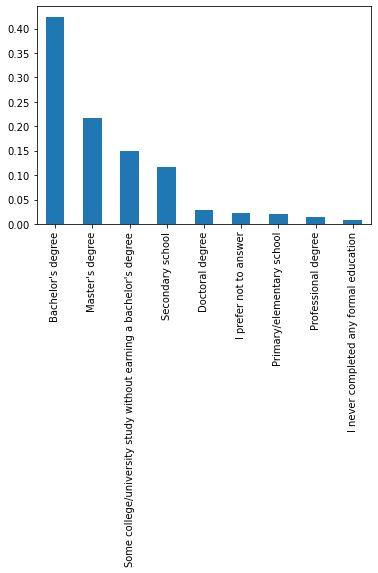

In [22]:
(ed_val/data.shape[0]).plot(kind='bar');

we found that most of the developers around 45% have bachelor's degree

### Analysis for JobSatisfaction column

Proportion of missing values in **JobSatisfaction** column

In [23]:
missing_values = data['JobSatisfaction'].isnull().mean()
missing_values

0.20149722542142184

According to Employment status which group have the highest job satisfaction

In [24]:
satisfaction = data.groupby(['EmploymentStatus']).mean()['JobSatisfaction']
satisfaction.sort_values(ascending=False)

EmploymentStatus
Independent contractor, freelancer, or self-employed    7.231985
Employed full-time                                      6.980608
Employed part-time                                      6.846154
I prefer not to say                                          NaN
Not employed, and not looking for work                       NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

Job satisfaction of a small company employee

In [25]:
satisfaction_of_small_companies = data.groupby(['CompanySize']).mean()['JobSatisfaction']
satisfaction_of_small_companies

CompanySize
1,000 to 4,999 employees    6.908506
10 to 19 employees          7.035739
10,000 or more employees    6.793617
100 to 499 employees        7.029324
20 to 99 employees          6.997039
5,000 to 9,999 employees    6.832155
500 to 999 employees        7.029967
Fewer than 10 employees     7.025719
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64

### Does doctoral degree increases the chance of getting job you like

In [26]:
chance_of_job_you_like = data.groupby(['FormalEducation']).mean()['JobSatisfaction']
chance_of_job_you_like.sort_values(ascending=False)

FormalEducation
Doctoral degree                                                      7.438492
Secondary school                                                     7.219512
I prefer not to answer                                               7.211679
Some college/university study without earning a bachelor's degree    7.151268
Professional degree                                                  7.075893
I never completed any formal education                               7.000000
Master's degree                                                      6.977356
Primary/elementary school                                            6.946237
Bachelor's degree                                                    6.900293
Name: JobSatisfaction, dtype: float64

The chance of getting a job you like after doctoral degree is high

# Machine Learning

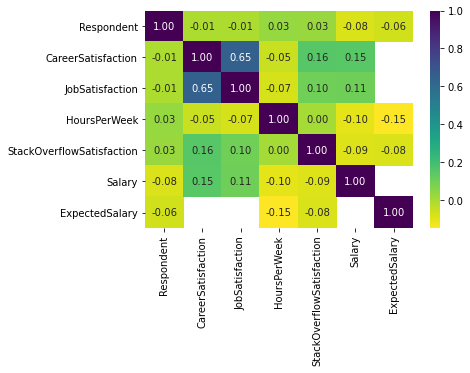

In [27]:
sb.heatmap(data.corr(), annot=True, fmt='.2f', cmap='viridis_r');

Check for missing data in our label column **Salary**

In [31]:
data['Salary'].isnull()

0         True
1         True
2        False
3         True
4         True
         ...  
19097     True
19098     True
19099     True
19100    False
19101     True
Name: Salary, Length: 19102, dtype: bool

### Clean Data

let's create a function to clean the data, fill the missing data and convert 'object' data type to categorical

In [32]:
def clean_code(data):
    #drop rows with missing salary values
    data = data.dropna(subset=['Salary'], axis=0)
    
    #split data into features and labels
    X = data.drop('Salary', axis=1)
    y = data['Salary']
    
    #drop Repondent and ExpectedSalary columns
    X = X.drop(['Respondent', 'ExpectedSalary'], axis=1)
    
    #create a variable with only numerical columns
    num_cols = X.select_dtypes(include=['int', 'float']).columns
    #fill the missing numerical columns with the mean
    for col in num_cols:
        X[col].fillna(X[col].mean(), inplace=True)
    
    #create a variable with only categorical columns
    cat_cols = X.select_dtypes(include=['object']).columns
    #convert object to categorical by using pandas' dummy variables
    for col in cat_cols:
        X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
        
    return X, y

In [35]:
X, y = clean_code(data)
X.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Albania,Country_Argentina,Country_Armenia,...,QuestionsInteresting_Strongly agree,QuestionsInteresting_Strongly disagree,QuestionsConfusing_Disagree,QuestionsConfusing_Somewhat agree,QuestionsConfusing_Strongly agree,QuestionsConfusing_Strongly disagree,InterestedAnswers_Disagree,InterestedAnswers_Somewhat agree,InterestedAnswers_Strongly agree,InterestedAnswers_Strongly disagree
2,8.0,9.0,2.447415,8.000000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,8.0,8.0,2.447415,8.000000,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17,9.0,8.0,2.447415,8.000000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
18,5.0,3.0,2.447415,8.442686,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,8.0,9.0,2.447415,8.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


The data is cleaned and ready for training

### Split data into train and test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [55]:
lr = LinearRegression()
sgd = SGDRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

def fit_predict(model):
    model.fit(X_train, y_train)
    pred = lr.predict(X_test)
    score = r2_score(y_test, pred)
    return score

In [57]:
score_lr = fit_predict(lr)
score_sgd = fit_predict(sgd)
score_svr = fit_predict(svr)
print(f"{score_lr, score_sgd, score_svr}")


(0.4684500164170966, 0.4684500164170966, 0.4684500164170966)
